<a href="https://colab.research.google.com/github/kin-cunico/ML_LR_RF/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ML Project



# Load the data

In [2]:
import pandas as pd
data_frame = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv")
data_frame


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# Data preparation

### Data separation as x and y

In [3]:
y = data_frame["logS"]
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [4]:
x = data_frame.drop("logS", axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Data splitting

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

#### x_train

In [6]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


#### x_test

In [7]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


#### y_train

In [8]:
y_train

107   -4.440
378   -1.250
529   -1.655
546   -1.886
320   -0.740
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 915, dtype: float64

#### y_test

In [9]:
y_test

822    -3.380
118    -8.010
347    -2.160
1123   -1.170
924    -0.730
        ...  
1114   -4.130
427    -9.018
711    -0.600
4      -3.040
948    -2.900
Name: logS, Length: 229, dtype: float64

# Model building

## Linear Regression

### Training the model

In [19]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

LinearRegression()

### Applying the model

In [29]:
y_linear_regression_train_pred = linear_regression.predict(x_train)
y_linear_regression_test_pred = linear_regression.predict(x_test)

### Evaluate model performance

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

linear_regression_train_mse = mean_squared_error(y_train, y_linear_regression_train_pred)
linear_regression_train_r2 = r2_score(y_train, y_linear_regression_train_pred)

linear_regression_test_mse = mean_squared_error(y_test, y_linear_regression_test_pred)
linear_regression_test_r2 = r2_score(y_test, y_linear_regression_test_pred)


In [23]:
print("LR MSE TRAIN:", linear_regression_train_mse)
print("LR R2 TRAIN:", linear_regression_train_r2)
print("LR MSE TEST:", linear_regression_test_mse)
print("LR R2 TEST:", linear_regression_test_r2)

LR MSE TRAIN: 1.0075362951093687
LR R2 TRAIN: 0.7645051774663391
LR MSE TEST: 1.0206953660861033
LR R2 TEST: 0.7891616188563282


### Results

In [27]:
linear_regression_res = pd.DataFrame(["Linear Regression:", linear_regression_train_mse, linear_regression_train_r2, linear_regression_test_mse, linear_regression_test_r2]).transpose()
linear_regression_res.columns = ["Method", "Training MSE", "Training r2", "Testing MSE", "Testing r2"]
linear_regression_res

,Method,Training MSE,Training r2,Testing MSE,Testing r2
0,Linear Regression:,1.007536,0.764505,1.020695,0.789162


## **Random Forest**

### Training the model

In [30]:
from sklearn.ensemble import RandomForestRegressor

ran_forest = RandomForestRegressor(max_depth=2, random_state=100)

ran_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying the model to make a prediction

In [31]:
y_ran_forest_train_pred = ran_forest.predict(x_train)
y_ran_forest_test_pred = ran_forest.predict(x_test)

### Evaluating model performance

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

ran_forest_train_mse = mean_squared_error(y_train, y_ran_forest_train_pred)
ran_forest_train_r2 = r2_score(y_train, y_ran_forest_train_pred)

ran_forest_test_mse = mean_squared_error(y_test, y_ran_forest_test_pred)
ran_forest_test_r2 = r2_score(y_test, y_ran_forest_test_pred)

### Results

In [34]:
ran_forest_res = pd.DataFrame(["Random Forest:", ran_forest_train_mse, ran_forest_train_r2, ran_forest_test_mse, ran_forest_test_r2]).transpose()
ran_forest_res.columns = ["Method", "Training MSE", "Training r2", "Testing MSE", "Testing r2"]
ran_forest_res

,Method,Training MSE,Training r2,Testing MSE,Testing r2
0,Random Forest:,1.028228,0.759669,1.407688,0.709223


## Model Comparison

In [38]:
df_models = pd.concat([ran_forest_res, linear_regression_res], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training r2,Testing MSE,Testing r2
0,Random Forest:,1.028228,0.759669,1.407688,0.709223
1,Linear Regression:,1.007536,0.764505,1.020695,0.789162


## Data Viz

### Linear Regression graph

Text(0.5, 0, '• Experimental logS')

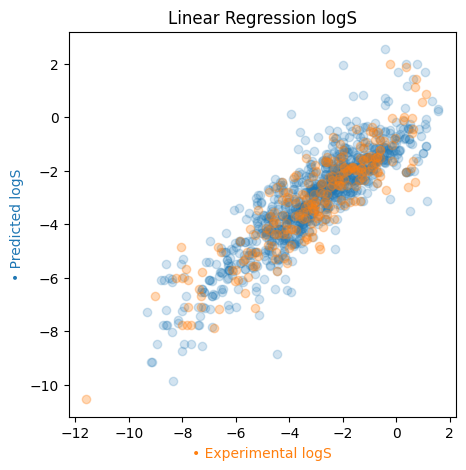

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_linear_regression_train_pred, alpha=.2)
plt.scatter(x=y_test, y=y_linear_regression_test_pred, alpha=.3)

plt.plot()
plt.title("Linear Regression logS")
plt.ylabel("• Predicted logS", c="C0")
plt.xlabel("• Experimental logS", c="C1")


### Random Forest Graph

Text(0.5, 0, '• Experimental logS')

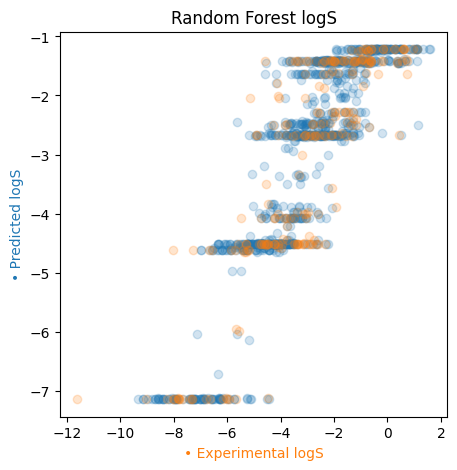

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_ran_forest_train_pred, alpha=.2)
plt.scatter(x=y_test, y=y_ran_forest_test_pred, alpha=.2)

plt.plot()
plt.title("Random Forest logS")
plt.ylabel("• Predicted logS", c="C0")
plt.xlabel("• Experimental logS", c="C1")